In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "SOL"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/baseline

Average verified rate: 0.9364626634705829

Average of error rates: 0.06729305283757338

Total token count: 1285323



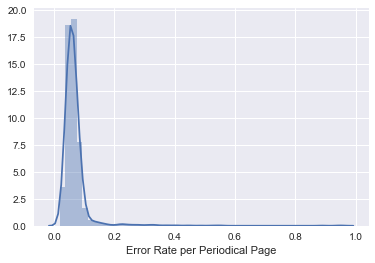

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 100 )

[('¥', 2308),
 ('-', 1926),
 ('tion', 1340),
 ('re-', 1275),
 ('con-', 999),
 ("'", 914),
 ('in-', 876),
 ('ment', 743),
 ('de-', 697),
 ('t', 677),
 ('¥¥', 661),
 ('sun-', 596),
 ('com-', 547),
 ('be-', 542),
 ('*', 540),
 (')', 535),
 ('n', 469),
 ('en-', 451),
 ('ñ', 438),
 ('pro-', 406),
 ('d', 405),
 ('ex-', 403),
 ('w', 398),
 ('e', 398),
 ('th', 395),
 ('tions', 346),
 ('m', 326),
 ('dis-', 310),
 ('ob-', 285),
 ('govern-', 277),
 ('gov-', 271),
 ('per-', 263),
 ('un-', 254),
 ('sab-', 252),
 ('g', 247),
 ('co', 240),
 ('ac-', 239),
 ('im-', 225),
 ('pre-', 213),
 ('ernment', 210),
 ('ligious', 209),
 ('ap-', 198),
 ('ance', 193),
 ('x', 186),
 ('f', 180),
 ('chris-', 178),
 ('sunday-closing', 175),
 ('r', 172),
 ('at-', 170),
 ('ad-', 168),
 ('al-', 164),
 ('an-', 161),
 ('(', 161),
 ('u', 145),
 ('na-', 142),
 ('as-', 139),
 ('ence', 137),
 ('ments', 136),
 ('servance', 131),
 ('ity', 127),
 ('ar-', 126),
 ('mat-', 121),
 ('relig-', 121),
 ('em-', 120),
 ('ques-', 118),
 ('leg

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:100]

[('¥', 2308),
 ('¥¥', 661),
 ('*', 540),
 (')', 535),
 ('ñ', 438),
 ('(', 161),
 ('/', 92),
 ('•', 91),
 (']', 78),
 ('ñthe', 62),
 ('[the', 62),
 ('(sunday)', 61),
 ('%', 60),
 ('ó', 52),
 ('_', 47),
 ('(the', 42),
 ('+', 37),
 ('ã', 36),
 ('[of', 31),
 ('¥¥¥', 29),
 ('ñeditor', 29),
 ('=', 28),
 ('**', 27),
 ('[', 27),
 ('è', 25),
 ('combinationñthe', 24),
 ('republicsñrome', 24),
 ('(and', 24),
 ('(which', 23),
 ('%c', 23),
 ('••', 23),
 ('ña', 21),
 ('ñthat', 21),
 ('ö', 21),
 ('-¥', 20),
 ('(see', 20),
 ('(minn', 20),
 ('(n', 20),
 ('\\', 20),
 ('sundayñno', 19),
 ('`', 19),
 ('ô', 19),
 ('¥-', 19),
 ('¥+¥', 19),
 ('ñnew', 18),
 ('ñat', 18),
 ('*the', 17),
 ('the¥', 16),
 ('*¥', 16),
 ('(mass', 15),
 ('>', 15),
 ('ñdr', 15),
 ('ñid', 15),
 ('ñit', 15),
 ('(continuing', 14),
 ('(as', 14),
 ('#', 14),
 ('to¥', 14),
 ('ñfrom', 14),
 ('\ufeff', 13),
 ('¥the', 13),
 ('ñsee', 12),
 ('¡', 11),
 ('page)', 11),
 ('¥*', 11),
 ('ñto', 11),
 ('¥-¥', 11),
 ('(a', 11),
 ('(iowa)', 11),
 ('(alth

## Correction 1 -- Normalize Special Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction1

Average verified rate: 0.9441270584562553

Average of error rates: 0.058811154598825834

Total token count: 1281300



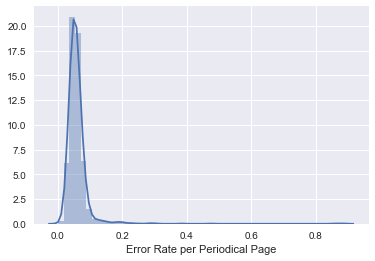

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 2104),
 ('tion', 1347),
 ('re-', 1276),
 ('con-', 999),
 ("'", 967),
 ('in-', 877),
 ('ment', 746),
 ('t', 738),
 ('de-', 697),
 ('sun-', 601),
 ('com-', 548),
 ('be-', 542),
 ('n', 502),
 ('en-', 452),
 ('e', 437),
 ('d', 414),
 ('w', 410),
 ('pro-', 406),
 ('ex-', 403),
 ('th', 397),
 ('tions', 348),
 ('m', 330),
 ('dis-', 310),
 ('ob-', 285),
 ('govern-', 277),
 ('gov-', 272),
 ('per-', 264),
 ('g', 256),
 ('un-', 255),
 ('sab-', 254),
 ('co', 240),
 ('ac-', 239),
 ('im-', 226),
 ('x', 226),
 ('pre-', 213),
 ('ernment', 212),
 ('ligious', 210),
 ('ap-', 199),
 ('f', 197),
 ('r', 196),
 ('ance', 193),
 ('chris-', 178),
 ('sunday-closing', 176),
 ('at-', 171),
 ('ad-', 168),
 ('al-', 164),
 ('an-', 162),
 ('u', 145),
 ('na-', 144),
 ('as-', 140)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction2

Average verified rate: 0.9814883735076206

Average of error rates: 0.02238747553816047

Total token count: 1249431



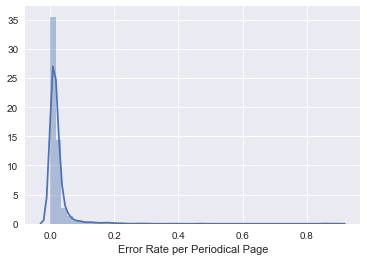

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 2090),
 ("'", 967),
 ('t', 737),
 ('n', 502),
 ('e', 435),
 ('d', 414),
 ('w', 410),
 ('th', 397),
 ('m', 330),
 ('g', 255),
 ('co', 239),
 ('x', 226),
 ('sunday-closing', 201),
 ('f', 196),
 ('r', 196),
 ('u', 145),
 ('sunday-enforcement', 134),
 ('sunday-law', 123),
 ("clerks'", 96),
 ('pa', 96),
 ('mo', 77),
 ('k', 65),
 ('io', 56),
 ('z', 53),
 ("'the", 53),
 ('saloon-keepers', 51),
 ('oo', 50),
 ("barbers'", 49),
 ('--', 49),
 ("grocers'", 45),
 ('wm', 44),
 ('mutchler', 42),
 ('church-and-state', 41),
 ('tion', 40),
 ('loth', 38),
 ('law-abiding', 36),
 ('street-cars', 35),
 ('mass-meeting', 33),
 ('non-receipt', 31),
 ("jones'", 29),
 ('e-z', 28),
 ('q', 28),
 ('non-sectarian', 27),
 ('thread-thought', 27),
 ('farmakis', 27),
 ("o'gorman", 27),
 ('saloonmen', 27),
 ('fellow-citizens', 26),
 ('sundayclosing', 26),
 ('lc', 25)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SOL19000510-V15-17-page10.txt: [('-', ''), ('-christian.', 'christian.')]
SOL19000510-V15-17-page11.txt: [('v-', 'v'), ('-', ''), ('polit-', 'polit'), ('-inch', 'inch')]
SOL19000510-V15-17-page13.txt: [('any-', 'any')]
SOL19000510-V15-17-page14.txt: [('-', ''), ('-', '')]
SOL19000510-V15-17-page15.txt: [('-', ''), ('-', '')]
SOL19000510-V15-17-page16.txt: [('-.Ie', '.Ie'), ('CO-', 'CO'), ('SEN-', 'SEN')]
SOL19000510-V15-17-page4.txt: [('-', ''), ('-', '')]
SOL19000510-V15-17-page7.txt: [('-', ''), ('gov-', 'gov')]
SOL19000510-V15-17-page9.txt: [('Sam-', 'Sam')]
SOL19000517-V15-18-page11.txt: [('pur-', 'pur')]
SOL19000517-V15-18-page14.txt: [('-to', 'to'), ('-', '')]
SOL19000517-V15-18-page15.txt: [('-', ''), ('-', '')]
SOL19000517-V15-18-page16.txt: [('-of', 'of')]
SOL19000517-V15-18-page3.txt: [('-', '')]
SOL19000517-V15-18-page4.txt: [('-', '')]
SOL19000517-V15-18-page5.txt: [('-', '')]
SOL19000517-V15-18-page9.txt: [('-', '')]
SOL19000531-V15-21-page12.txt: [('Fur-', 'Fur')]
SOL1900

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction3

Average verified rate: 0.9841079849444068

Average of error rates: 0.018933463796477496

Total token count: 1248174



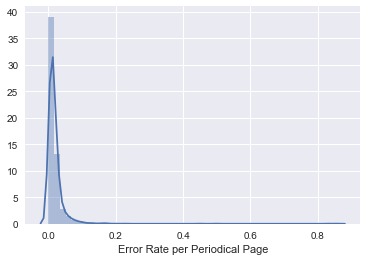

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 981),
 ('t', 750),
 ('n', 506),
 ('e', 479),
 ('d', 416),
 ('w', 410),
 ('th', 397),
 ('m', 334),
 ('g', 260),
 ('x', 250),
 ('co', 245),
 ('r', 203),
 ('f', 199),
 ('sunday-closing', 180),
 ('u', 147),
 ('sunday-enforcement', 125),
 ('sunday-law', 116),
 ("clerks'", 96),
 ('pa', 96),
 ('z', 84),
 ('mo', 79),
 ('k', 70),
 ('io', 56),
 ("'the", 53),
 ('oo', 50),
 ("barbers'", 49),
 ('saloon-keepers', 46),
 ("grocers'", 45),
 ('wm', 44),
 ('re', 42),
 ('mutchler', 42),
 ('church-and-state', 41),
 ('tion', 40),
 ('loth', 38),
 ('law-abiding', 35),
 ('ex', 33),
 ('mass-meeting', 31),
 ('q', 30),
 ("jones'", 29),
 ('street-cars', 29),
 ("o'gorman", 27),
 ('farmakis', 27),
 ('saloonmen', 27),
 ('sundayclosing', 26),
 ('rest-day', 25),
 ('ourduty', 25),
 ('ment', 25),
 ('lc', 25),
 ('al', 24),
 ('tinel', 24)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SOL19000510-V15-17-page13.txt: [("'In", 'In')]
SOL19000510-V15-17-page14.txt: [("'same", 'same')]
SOL19000510-V15-17-page15.txt: [("'half", 'half')]
SOL19000510-V15-17-page16.txt: [("'Tony", 'Tony'), ("'orders", 'orders'), ("'The", 'The')]
SOL19000510-V15-17-page6.txt: [("'Him", 'Him')]
SOL19000510-V15-17-page7.txt: [("'Tarry", 'Tarry')]
SOL19000510-V15-17-page8.txt: [("'Thou", 'Thou'), ("'and", 'and')]
SOL19000517-V15-18-page12.txt: [("'goo", 'goo')]
SOL19000517-V15-18-page16.txt: [("'zany", 'zany')]
SOL19000517-V15-18-page2.txt: [("'the", 'the')]
SOL19000517-V15-18-page4.txt: [("'As", 'As'), ("'Hail", 'Hail')]
SOL19000517-V15-18-page7.txt: [("'Blessing", 'Blessing')]
SOL19000517-V15-18-page9.txt: [("'The", 'The')]
SOL19000531-V15-21-page12.txt: [("'pleading", 'pleading')]
SOL19000531-V15-21-page14.txt: [("'to", 'to')]
SOL19000531-V15-21-page16.txt: [("'judge", 'judge')]
SOL19000531-V15-21-page4.txt: [("'We", 'We')]
SOL19000531-V15-21-page8.txt: [("'world", 'world')]
SOL19000614-V15-2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction4

Average verified rate: 0.984747821460735

Average of error rates: 0.018210371819960866

Total token count: 1248084



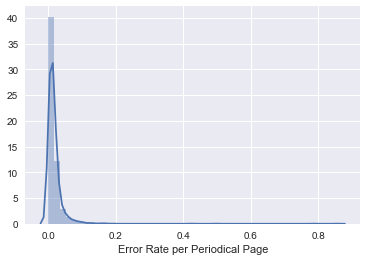

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 890),
 ('t', 760),
 ('n', 508),
 ('e', 487),
 ('d', 417),
 ('w', 413),
 ('th', 397),
 ('m', 334),
 ('g', 261),
 ('x', 250),
 ('co', 245),
 ('r', 207),
 ('f', 199),
 ('sunday-closing', 180),
 ('u', 147),
 ('sunday-enforcement', 125),
 ('sunday-law', 116),
 ("clerks'", 96),
 ('pa', 96),
 ('z', 85),
 ('mo', 79),
 ('k', 70),
 ('io', 56),
 ('oo', 50),
 ("barbers'", 49),
 ('saloon-keepers', 46),
 ("grocers'", 45),
 ('wm', 44),
 ('mutchler', 43),
 ('re', 42),
 ('church-and-state', 41),
 ('tion', 40),
 ('loth', 38),
 ('law-abiding', 35),
 ('ex', 33),
 ('mass-meeting', 31),
 ('q', 30),
 ('street-cars', 29),
 ("o'gorman", 27),
 ('farmakis', 27),
 ('saloonmen', 27),
 ('sundayclosing', 26),
 ('rest-day', 25),
 ('ourduty', 25),
 ('ment', 25),
 ('lc', 25),
 ('al', 24),
 ('tinel', 24),
 ('se', 24),
 ("butchers'", 24)]

## Correction 5 -- Remove Long Errors

In [25]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['gold-embroidered',
  'oxecexexecececeozacexeceo',
  "ittttttt-'''''''",
  'self-renunciation',
  'vrammtwolimtrytwzroamptruuoywy',
  'selfcontradictory',
  'sabbath-breaking',
  'christmas-observing',
  'release-from-toil',
  'dog-in-the-manger',
  'boarding-schools',
  'self-constituted',
  'unchristianizing',
  'ifligsoitritiased',
  'german-protestant',
  'neo-jeffersonian',
  'national-reformers',
  'politico-ecclesiastical',
  'long-established',
  'oneseventh-dayobservertriedandfined',
  'the-constitution',
  "representatives'",
  'pro-administration',
  'sunday-observing',
  'titittimitiviiiiityytyytitimiitwittitymy',
  'respectablechristian',
  'ante-confederation',
  'attorneys-general',
  'ytttrywyttimitfivitittm',
  'inter-denominational',
  'lieutenant-general',
  'completelyreversedbytjuicsehimself',
  'classpfcitizenswhodseisretohavetheir',
  'principle-governed',
  'disfranthisement',
  'multi-millionaires',
  'self-preservation',
  'bothasindividualsandasa',
  'ordin

In [26]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction4"
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "v|V"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "t|T"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "r|R"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SOL19000510-V15-17-page11.txt: [('IITTIMITYTTITYffITTIT', ' ')]
SOL19000614-V15-23-page10.txt: [('MYIMIVITYMMYYMITITIMITIMMYWITIMMI', ' ')]
SOL19000816-V15-32-page10.txt: [('YTTTRYWYTTIMITFIVITITTM', ' ')]
SOL19000823-V15-33-page15.txt: [('TTTTTTTTTTTTTTTTTTTTTTTTTTK', ' ')]
SOL19000913-V15-36-page15.txt: [("TTI'TTTTTT.TTTTTTTTTTTTTTTTTTTTTTTTIC", ' ')]
SOL19000927-V15-38-page15.txt: [('rrrrrrrrrrrrrrrr', ' '), ('rrrrrrrrrrrrrrrrrrrrn', ' ')]
SOL19001005-V15-39-page15.txt: [("'TTTTTTTTTTTTrrTTTTT.TTTTT", ' ')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction5

Average verified rate: 0.9847549225807744

Average of error rates: 0.01820352250489237

Total token count: 1248075



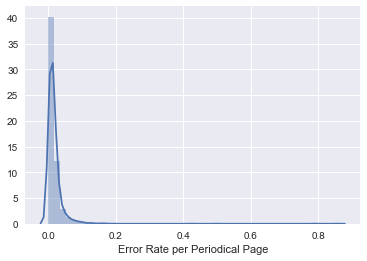

In [27]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [28]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 890),
 ('t', 760),
 ('n', 508),
 ('e', 487),
 ('d', 417),
 ('w', 413),
 ('th', 397),
 ('m', 334),
 ('g', 261),
 ('x', 250),
 ('co', 245),
 ('r', 207),
 ('f', 199),
 ('sunday-closing', 180),
 ('u', 147),
 ('sunday-enforcement', 125),
 ('sunday-law', 116),
 ("clerks'", 96),
 ('pa', 96),
 ('z', 85),
 ('mo', 79),
 ('k', 70),
 ('io', 56),
 ('oo', 50),
 ("barbers'", 49),
 ('saloon-keepers', 46),
 ("grocers'", 45),
 ('wm', 44),
 ('mutchler', 43),
 ('re', 42),
 ('church-and-state', 41),
 ('tion', 40),
 ('loth', 38),
 ('law-abiding', 35),
 ('ex', 33),
 ('mass-meeting', 31),
 ('q', 30),
 ('street-cars', 29),
 ("o'gorman", 27),
 ('farmakis', 27),
 ('saloonmen', 27),
 ('sundayclosing', 26),
 ('rest-day', 25),
 ('ourduty', 25),
 ('ment', 25),
 ('lc', 25),
 ('al', 24),
 ('tinel', 24),
 ('se', 24),
 ('non-receipt', 24)]

## Correction 6 -- Separate Squashed Words

In [29]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

SOL19000510-V15-17-page11.txt: [('IIVYMYYTWITYYTTIVITY', 'I IV Y M Y Y T W I T Y Y T T I V I T Y')]
SOL19000726-V15-29-page1.txt: [('thestatehasnorighttoprohibitit', 'the state has no right to prohibit it')]
SOL19000726-V15-29-page16.txt: [('artedsandllissenotljelphiramr', 'art ed sand l l is sen ot l j el p h ir am r')]
SOL19000816-V15-32-page3.txt: [('considerablepolitical', 'considerable political')]
SOL19020401-V17-05-page50.txt: [('politicoecclesiastical', 'politic o ecclesiastical')]
SOL19020901-V17-10-page47.txt: [('completelyreversedbytjuicsehimself', 'completely reversed by t j u i c s e h i m s e l f')]
SOL19021001-V17-11-page60.txt: [('MentalandMoralValue', 'Mental and Moral Value')]
SOL19030409-V18-15-page14.txt: [('fellowreligionists', 'fellow religionists')]
SOL19030514-V18-20-page12.txt: [('respectableChristian', 'respectable Christian')]
SOL19030604-V18-23-page7.txt: [('fellowrevolutionists', 'fellow revolutionists')]
SOL19030820-V18-34-page3.txt: [('Chrisrepresentative

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/SOL/correction6

Average verified rate: 0.9847541874107677

Average of error rates: 0.01820352250489237

Total token count: 1248146



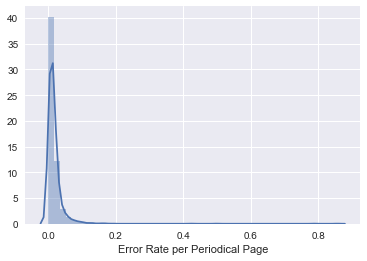

In [30]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [31]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 890),
 ('t', 766),
 ('n', 508),
 ('e', 489),
 ('d', 417),
 ('w', 414),
 ('th', 397),
 ('m', 336),
 ('g', 261),
 ('x', 250),
 ('co', 245),
 ('r', 208),
 ('f', 200),
 ('sunday-closing', 180),
 ('u', 148),
 ('sunday-enforcement', 125),
 ('sunday-law', 116),
 ("clerks'", 96),
 ('pa', 96),
 ('z', 85),
 ('mo', 79),
 ('k', 70),
 ('io', 56),
 ('oo', 50),
 ("barbers'", 49),
 ('saloon-keepers', 46),
 ("grocers'", 45),
 ('wm', 44),
 ('mutchler', 43),
 ('re', 42),
 ('church-and-state', 41),
 ('tion', 40),
 ('loth', 38),
 ('law-abiding', 35),
 ('ex', 33),
 ('mass-meeting', 31),
 ('q', 30),
 ('street-cars', 29),
 ("o'gorman", 27),
 ('farmakis', 27),
 ('saloonmen', 27),
 ('sundayclosing', 26),
 ('rest-day', 25),
 ('ourduty', 25),
 ('ment', 25),
 ('lc', 25),
 ('al', 24),
 ('tinel', 24),
 ('se', 24),
 ('non-receipt', 24)]

## Review Remaining Errors

In [32]:
GoH.reports.docs_with_high_error_rate(summary)

[('SOL19011201-V17-01-page61.txt', 0.857),
 ('SOL19020301-V17-04-page63.txt', 0.789),
 ('SOL19020201-V17-03-page63.txt', 0.5),
 ('SOL19020501-V17-06-page20.txt', 0.425)]

In [33]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

SOL19011201-V17-01-page61.txt

SOL19020301-V17-04-page63.txt

SOL19020201-V17-03-page63.txt

SOL19020501-V17-06-page20.txt



SOL19011201-V17-01-page61.txt, SOL19020301-V17-04-page63.txt, SOL19020201-V17-03-page63.txt are blank. SOL19020501-V17-06-page20.txt has a large chunk that is on a diagonal.